In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv(r"C:\Users\kasth\Downloads\Titanic-Dataset.csv")

In [28]:
# viewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic information about eda

In [29]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
# Describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Duplicaste values

In [31]:
#Find the duplicates

df.duplicated().sum()

0

### Unique values in the data

In [32]:
#no of unique values in a particular column

df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [34]:
df['Survived'].unique()

array([0, 1], dtype=int64)

### Visualize the unique values

<AxesSubplot:xlabel='Pclass', ylabel='count'>

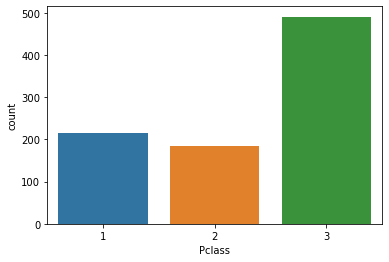

In [35]:
#Plot the unique values

sns.countplot(df['Pclass'])

### Find the Null values

In [36]:
#Find null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replace the null values

In [37]:
#Replace null values

df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Filter the data

In [38]:
#Filter data

df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


### Box plot

<AxesSubplot:>

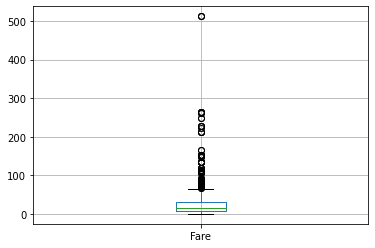

In [39]:
#Boxplot

df[['Fare']].boxplot()

### Correlation Plot - EDA

In [44]:
numeric_df = df.select_dtypes(include='number')

In [45]:
#Correlation 

numeric_df.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000


<AxesSubplot:>

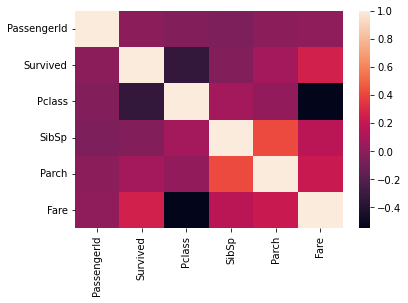

In [46]:
#Correlation plot

sns.heatmap(numeric_df.corr())